In [218]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [219]:
data=pd.read_excel('data/euro_dollar.xls',sheet_name='euro-dollar') # \s+ regex for 1 or more whitespaced

In [220]:
#with open("data/Euro_dollar/Last/Prices/Euro_dollar5min.txt", "r") as file:
#    data = str(file.read())
#data.info()

In [221]:
data5=data[['Unnamed: 24','Unnamed: 25','Unnamed: 26','Unnamed: 27','Unnamed: 28','Unnamed: 29','Unnamed: 30']]

In [222]:
data5.columns=data5.iloc[2]

In [223]:
data5=data5.drop([0,1,2],axis=0)

In [224]:
# convert Date column to pd.datetime
data5['Date']=pd.to_datetime(data5['Date'])

In [225]:
data5['Year']=data5['Date'].dt.year
data5['Month']=data5['Date'].dt.month
data5['Week']=data5['Date'].dt.isocalendar().week
data5['Day']=data5['Date'].dt.day
data5['Hour']=data5['Date'].dt.hour
data5['Min']=data5['Date'].dt.minute
data5['Weekday']=data5['Date'].dt.day_name()

In [226]:
#drop first entries to start with full day 
data5

2,Date,OPEN,HIGH,LOW,LAST_PRICE,NUMBER_TICKS,VOLUME,Year,Month,Week,Day,Hour,Min,Weekday
3,2009-12-09 23:05:00,1.473,1.4732,1.4729,1.473,591,0,2009,12,50,9,23,5,Wednesday
4,2009-12-09 23:10:00,1.473,1.4735,1.473,1.4734,927,0,2009,12,50,9,23,10,Wednesday
5,2009-12-09 23:15:00,1.4734,1.4737,1.4734,1.4736,1054,0,2009,12,50,9,23,15,Wednesday
6,2009-12-09 23:20:00,1.4737,1.474,1.4735,1.4735,1026,0,2009,12,50,9,23,20,Wednesday
7,2009-12-09 23:25:00,1.4735,1.4742,1.4735,1.4741,1231,0,2009,12,50,9,23,25,Wednesday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41022,2010-06-24 16:50:00,1.2312,1.2315,1.2304,1.2307,3674,0,2010,6,25,24,16,50,Thursday
41023,2010-06-24 16:55:00,1.2307,1.2319,1.2305,1.2319,4014,0,2010,6,25,24,16,55,Thursday
41024,2010-06-24 17:00:00,1.2319,1.2319,1.2306,1.2311,4318,0,2010,6,25,24,17,0,Thursday
41025,2010-06-24 17:05:00,1.2311,1.2312,1.23,1.2308,4069,0,2010,6,25,24,17,5,Thursday


In [227]:
# identify idexes of first and last entries that belong to incomplete days
first_entries=data5[(data5.Month==12) & (data5.Day==9)].index
last_entries=data5[(data5.Month==6)&(data5.Day==24)].index

In [228]:
first_entries

Int64Index([3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13], dtype='int64')

In [229]:
# delete them but keep last entry before relevant excerpt, so not +1 "first_entries[-1]+1"
data5=data5.loc[first_entries[-1]:last_entries[0]-1]

In [230]:
data5.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40807 entries, 13 to 40819
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          40807 non-null  datetime64[ns]
 1   OPEN          40807 non-null  object        
 2   HIGH          40807 non-null  object        
 3   LOW           40807 non-null  object        
 4   LAST_PRICE    40807 non-null  object        
 5   NUMBER_TICKS  40807 non-null  object        
 6   VOLUME        40807 non-null  object        
 7   Year          40807 non-null  int64         
 8   Month         40807 non-null  int64         
 9   Week          40807 non-null  UInt32        
 10  Day           40807 non-null  int64         
 11  Hour          40807 non-null  int64         
 12  Min           40807 non-null  int64         
 13  Weekday       40807 non-null  object        
dtypes: UInt32(1), datetime64[ns](1), int64(5), object(7)
memory usage: 4.6+ MB


In [231]:
#change format from object to float (to use np.log() in next step)
data5['LAST_PRICE']=data5['LAST_PRICE'].astype(float, errors = 'raise')

/var/folders/2k/z2y5yn090377tp7bttrptblr0000gn/T/ipykernel_95078/820850954.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data5['LAST_PRICE']=data5['LAST_PRICE'].astype(float, errors = 'raise')


In [232]:
# calculate log returs
data5['log_returns']=np.log(data5['LAST_PRICE'])-np.log(data5['LAST_PRICE']).shift()

/var/folders/2k/z2y5yn090377tp7bttrptblr0000gn/T/ipykernel_95078/2780447112.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data5['log_returns']=np.log(data5['LAST_PRICE'])-np.log(data5['LAST_PRICE']).shift()


In [233]:
test=np.log(data5['LAST_PRICE'][14])-np.log(data5['LAST_PRICE'][13])
test.round(6)

-0.000136

In [234]:
# delete first entry, which was only used to calculate first return for the first day
data5=data5.drop([13],axis=0)

In [235]:
data5

2,Date,OPEN,HIGH,LOW,LAST_PRICE,NUMBER_TICKS,VOLUME,Year,Month,Week,Day,Hour,Min,Weekday,log_returns
14,2009-12-10 00:00:00,1.4739,1.474,1.4737,1.4737,818,0,2009,12,50,10,0,0,Thursday,-0.000136
15,2009-12-10 00:05:00,1.4737,1.4739,1.4736,1.4739,700,0,2009,12,50,10,0,5,Thursday,0.000136
16,2009-12-10 00:10:00,1.4739,1.4739,1.4737,1.4738,644,0,2009,12,50,10,0,10,Thursday,-0.000068
17,2009-12-10 00:15:00,1.4738,1.4739,1.4737,1.4738,677,0,2009,12,50,10,0,15,Thursday,0.000000
18,2009-12-10 00:20:00,1.4738,1.4739,1.4737,1.4739,1116,0,2009,12,50,10,0,20,Thursday,0.000068
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40815,2010-06-23 23:35:00,1.2317,1.2317,1.2312,1.2313,933,0,2010,6,25,23,23,35,Wednesday,-0.000325
40816,2010-06-23 23:40:00,1.2313,1.2314,1.2311,1.2312,737,0,2010,6,25,23,23,40,Wednesday,-0.000081
40817,2010-06-23 23:45:00,1.2312,1.2318,1.2312,1.2318,685,0,2010,6,25,23,23,45,Wednesday,0.000487
40818,2010-06-23 23:50:00,1.2318,1.2319,1.2314,1.2314,821,0,2010,6,25,23,23,50,Wednesday,-0.000325


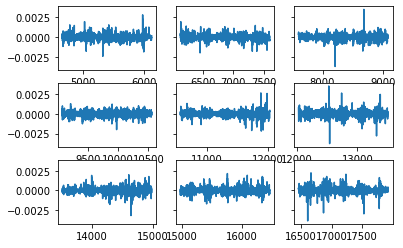

In [301]:
fig, (axs) = plt.subplots(nrows=3, ncols=3,sharey=True) 
axs[0,0].plot(data5['log_returns'][data5['Week']==1])
axs[0,1].plot(data5['log_returns'][data5['Week']==2])
axs[0,2].plot(data5['log_returns'][data5['Week']==3])
axs[1,0].plot(data5['log_returns'][data5['Week']==4])     
axs[1,1].plot(data5['log_returns'][data5['Week']==5])   
axs[1,2].plot(data5['log_returns'][data5['Week']==6])     
axs[2,0].plot(data5['log_returns'][data5['Week']==7])     
axs[2,1].plot(data5['log_returns'][data5['Week']==8])     
axs[2,2].plot(data5['log_returns'][data5['Week']==9])     

In [213]:
data5.groupby('Day')['Day'].count(),data5.groupby('Hour')['Hour'].count()

(Day
 1     1153
 2     1185
 3     1188
 4     1466
 5     1416
 6      904
 7     1230
 8     1428
 9     1159
 10    1488
 11    1748
 12    1416
 13     948
 14    1530
 15    1716
 16    1465
 17    1488
 18    1745
 19    1404
 20     958
 21    1532
 22    1716
 23    1468
 24    1199
 25    1391
 26    1404
 27     892
 28    1235
 29    1140
 30     892
 31     902
 Name: Day, dtype: int64,
 Hour
 0     1667
 1     1669
 2     1668
 3     1668
 4     1668
 5     1668
 6     1668
 7     1668
 8     1668
 9     1668
 10    1668
 11    1667
 12    1668
 13    1668
 14    1668
 15    1666
 16    1663
 17    1656
 18    1656
 19    1676
 20    1873
 21    1969
 22    1959
 23    1669
 Name: Hour, dtype: int64)

In [66]:
# split at each '\n' (new line)
input_data=data.split('\n')
# create numpy array (in order to change datatype to float)
input_data=np.array(input_data)
input_data=input_data.astype(np.float)
input_data=pd.DataFrame(input_data)